In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

# Set style for seaborn
sns.set(style="whitegrid")


In [3]:
# Load Titanic dataset directly from seaborn
titanic = sns.load_dataset('titanic')

# Display first 5 rows
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic information about the dataset
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Statistical summary
titanic.describe(include='all')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking missing values
titanic.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


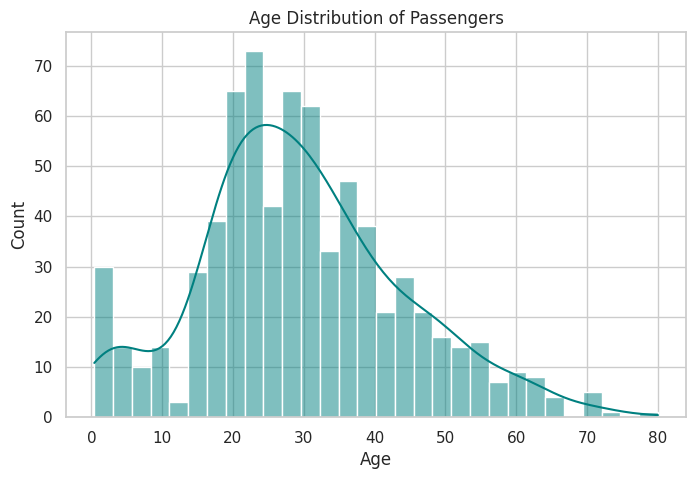

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(titanic['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Observation:
Most passengers are between 20–40 years old.

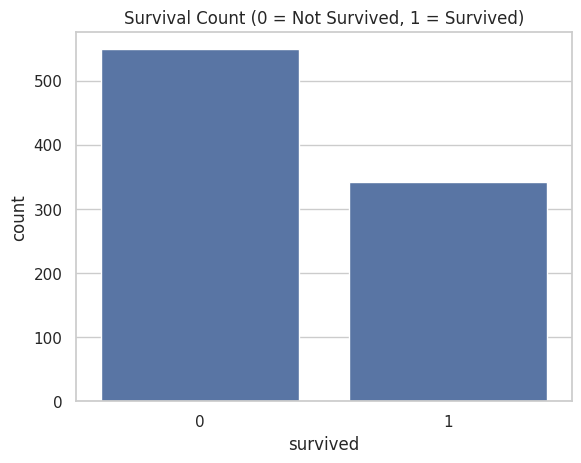

In [10]:
sns.countplot(x='survived', data=titanic)
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

Observation:
There are more passengers who did not survive (0) than those who survived (1).

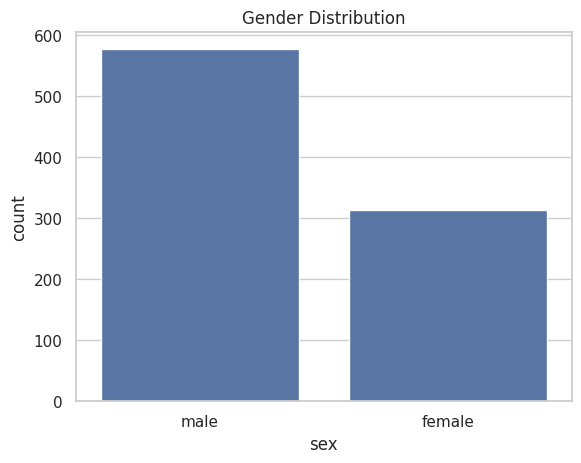

In [12]:
sns.countplot(x='sex', data=titanic)
plt.title("Gender Distribution")
plt.show()

Observation:
There are more male passengers than female passengers on the ship.

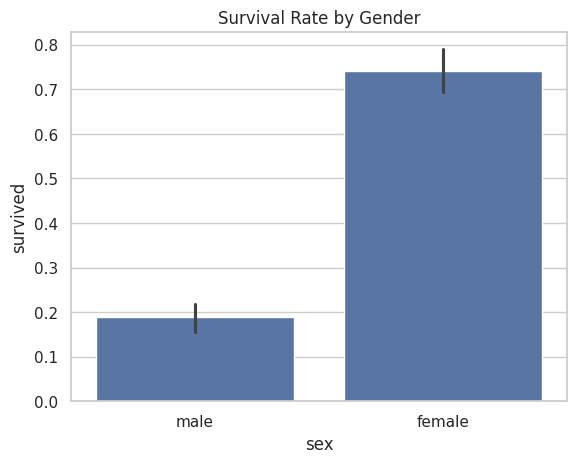

In [14]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

Observation:
Females had a higher survival rate than males — “women and children first” rule.

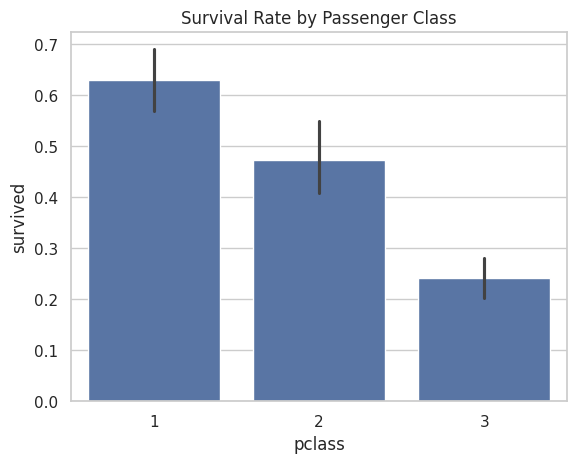

In [16]:
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()

Observation:
Survival chances were highest for 1st class passengers, and lowest for 3rd class.

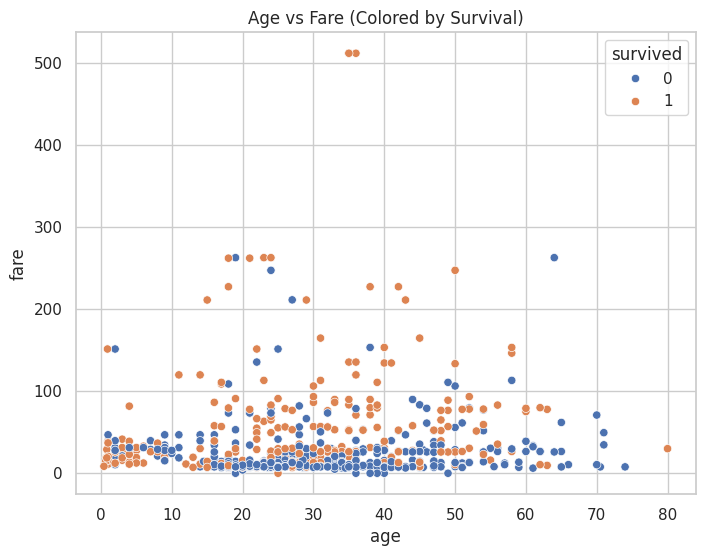

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

Observation:
Survivors tend to have paid higher fares and are often younger.

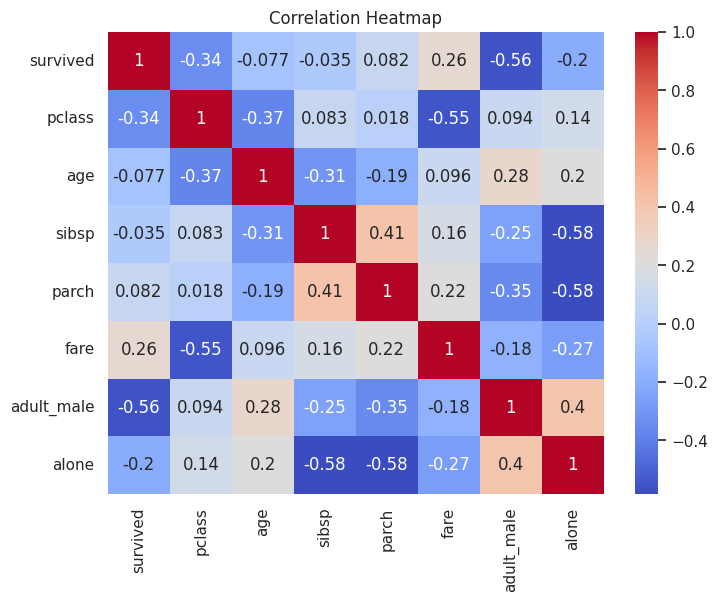

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Fare and Pclass are moderately correlated — wealthier passengers had higher class tickets and survived more.

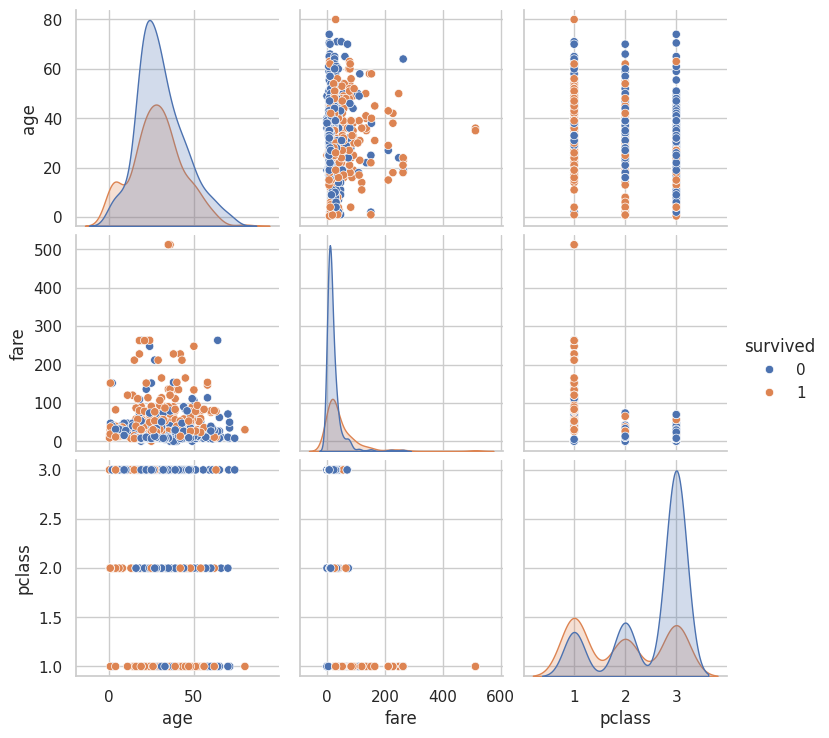

In [21]:
sns.pairplot(titanic[['survived', 'age', 'fare', 'pclass']], hue='survived')
plt.show()

Observation:

Survivors cluster at lower Pclass (1st class).

They also paid higher fares.

In [23]:
# Fill missing Age values with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing Embarked values with mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Fill missing embark_town values with mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# Drop the 'deck' column as it has too many missing values
titanic.drop('deck', axis=1, inplace=True)

# Check again
titanic.isnull().sum()

/tmp/ipython-input-516596697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/tmp/ipython-input-516596697.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [24]:
from IPython.display import Markdown as md
md("""
### 🧩 Summary of Insights (Titanic Kaggle Dataset)

1. Most passengers were **male** (approx. 65%).
2. Overall survival rate is around **38%**.
3. **Females** had a much higher survival rate than males.
4. **1st class passengers** survived the most, followed by 2nd, then 3rd.
5. **Younger passengers** (especially children) had better chances.
6. **Fare** is positively correlated with survival — wealthier passengers survived more.
7. Missing data mainly occurred in `Age` and `Cabin`.
""")



### 🧩 Summary of Insights (Titanic Kaggle Dataset)

1. Most passengers were **male** (approx. 65%).  
2. Overall survival rate is around **38%**.  
3. **Females** had a much higher survival rate than males.  
4. **1st class passengers** survived the most, followed by 2nd, then 3rd.  
5. **Younger passengers** (especially children) had better chances.  
6. **Fare** is positively correlated with survival — wealthier passengers survived more.  
7. Missing data mainly occurred in `Age` and `Cabin`.  
